<a href="https://colab.research.google.com/github/26-lion/Epilepsy-seizure-classification/blob/master/Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Visualisation


    X1   X2   X3   X4   X5   X6   X7  ...  X173  X174  X175  X176  X177  X178  y
0  135  190  229  223  192  125   55  ...   -77  -103  -127  -116   -83   -51  4
1  386  382  356  331  320  315  307  ...   152   157   156   154   143   129  1
2  -32  -39  -47  -37  -32  -36  -57  ...    19   -12   -30   -35   -35   -36  5
3 -105 -101  -96  -92  -89  -95 -102  ...   -77   -85   -77   -72   -69   -65  5
4   -9  -65  -98 -102  -78  -48  -16  ...   -32   -41   -65   -83   -89   -73  5

[5 rows x 179 columns]


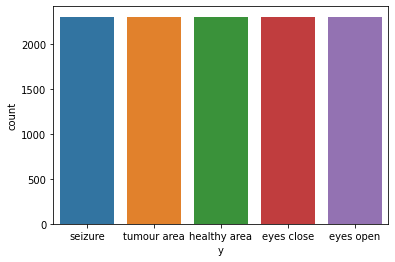

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
class_names = ["seizure", "tumour area", "healthy area", "eyes close", "eyes open"]
print(df.head())
a = sns.countplot(df.y)
a.set_xticklabels(class_names)
plt.show()

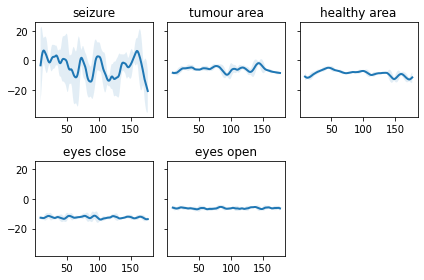

In [ ]:
df.sort_values(by="y", inplace=True)
def plot_time_series_classes(data, class_name, ax, n_steps=10):
    time_series_df = pd.DataFrame(data)
    smooth_path = time_series_df.rolling(n_steps).mean()
    path_deviation = 2*time_series_df.rolling(n_steps).std()
    under_line = (smooth_path-path_deviation)[0]
    over_line = (smooth_path+path_deviation)[0]
    ax.plot(smooth_path, linewidth=2)
    ax.fill_between(path_deviation.index, under_line, over_line, alpha=0.125)
    ax.set_title(class_name)



classes = df.y.unique()
fig2, axes = plt.subplots(2, 3, sharey=True)
for i, cls in enumerate(classes):
    ax = axes.flat[i]
    data = df[df.y == cls].drop(labels="y", axis=1).mean(axis=0).to_numpy()
    plot_time_series_classes(data, class_names[i], ax)
fig2.delaxes(axes.flat[-1])
fig2.tight_layout()
plt.show()

Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
Y = {2:0, 3:0, 4:0, 5:0, 1:1}
df.y = [Y[i] for i in df.y]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x_train , x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
def create_dataset(X):
  X = X.reshape(X.shape[0], 1, X.shape[1])
  return X
x_train = create_dataset(x_train)
x_test = create_dataset(x_test)
input1 = x_train.shape[1], x_train.shape[2]

Data visualisation after preprocessing


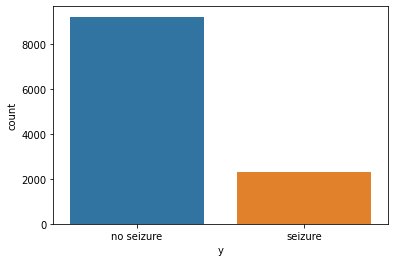

0    9200
1    2300
Name: y, dtype: int64


In [ ]:
class_names1 = ["no seizure", "seizure"]
a = sns.countplot(df.y)
a.set_xticklabels(class_names1)
plt.show()
print(df.y.value_counts())

Model


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv1D(32, 1, activation='relu', input_shape=input1))
model.add(Dropout(0.2))
model.add(Conv1D(32, 1, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=30, verbose=1, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

Epoch 1/30
216/216 [==============================] - 1s 3ms/step - loss: 8.9909 - accuracy: 0.6032 - val_loss: 3.5480 - val_accuracy: 0.6649
Epoch 2/30
216/216 [==============================] - 0s 2ms/step - loss: 3.2537 - accuracy: 0.6716 - val_loss: 1.9484 - val_accuracy: 0.7339
Epoch 3/30
216/216 [==============================] - 0s 2ms/step - loss: 1.9218 - accuracy: 0.7206 - val_loss: 1.3119 - val_accuracy: 0.7774
Epoch 4/30
216/216 [==============================] - 1s 2ms/step - loss: 1.3136 - accuracy: 0.7614 - val_loss: 0.8712 - val_accuracy: 0.7983
Epoch 5/30
216/216 [==============================] - 0s 2ms/step - loss: 0.9089 - accuracy: 0.7913 - val_loss: 0.6957 - val_accuracy: 0.8093
Epoch 6/30
216/216 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.8041 - val_loss: 0.6427 - val_accuracy: 0.8255
Epoch 7/30
216/216 [==============================] - 1s 2ms/step - loss: 0.5792 - accuracy: 0.8214 - val_loss: 0.5707 - val_accuracy: 0.8435
Epoch 

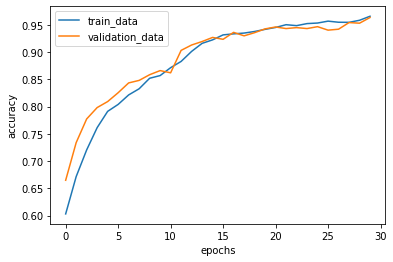

In [ ]:
plt.plot(history.history["accuracy"], label="train_data")
plt.plot(history.history["val_accuracy"], label="validation_data")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()


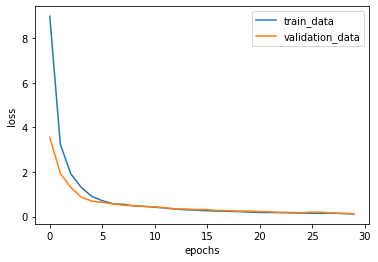

In [ ]:
train_data = plt.plot(history.history["loss"], label="train_data")
validation_data=plt.plot(history.history["val_loss"], label="validation_data")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()


In [ ]:
y_pred = model.predict(x_test)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2300
           1       0.96      0.83      0.89       575

    accuracy                           0.96      2875
   macro avg       0.96      0.91      0.93      2875
weighted avg       0.96      0.96      0.96      2875

the area under roc curve is 0.9812094517958413


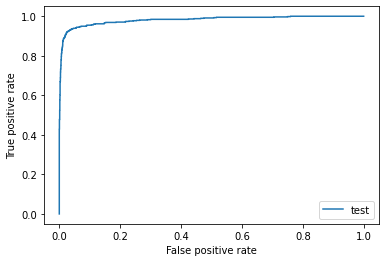

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
print(classification_report(y_test, y_pred.round()))
fpr, tpr, threshold = roc_curve(y_test, y_pred)
area = auc(fpr, tpr)
plt.plot(fpr, tpr, label="test")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
print("the area under roc curve is", area)

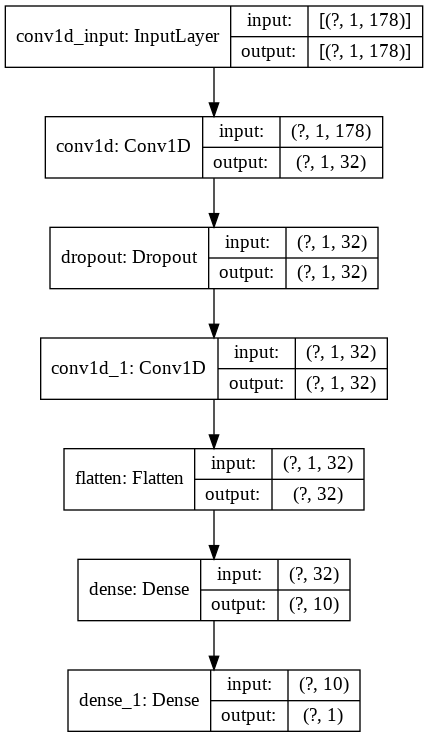

In [ ]:
import tensorflow as tf

tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)



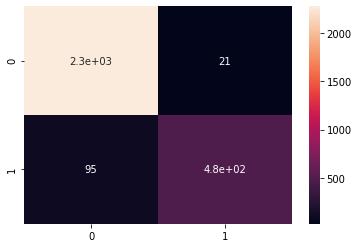

In [ ]:
cf = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cf, annot=True)